<a href="https://colab.research.google.com/github/heriy26/Testing/blob/main/IndonesiaHealthCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [129]:
df = pd.read_excel('health.xlsx')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(10)

,year,population,urban,male_u5,female_u5,male_ex,female_ex
0,1960,87751068,14.586,236.9,208.7,44.475,49.009
1,1961,90098394,14.821,230.7,203.2,45.098,49.604
2,1962,92518377,15.058,224.8,197.9,45.713,50.185
3,1963,95015297,15.299,218.9,192.6,46.322,50.752
4,1964,97596733,15.543,213.1,187.2,46.927,51.306
5,1965,100267062,15.789,207.3,181.7,47.533,51.851
6,1966,103025426,16.039,201.4,176.2,48.146,52.389
7,1967,105865571,16.293,195.4,170.6,48.767,52.925
8,1968,108779924,16.549,189.5,NaN,49.395,53.461
9,1969,111758563,16.809,183.5,159.4,50.030,53.999


In [130]:
df1 = df.interpolate(method ='linear', limit_direction ='forward')
df1.head(10)

,year,population,urban,male_u5,female_u5,male_ex,female_ex
0,1960,87751068,14.586,236.9,208.7,44.475,49.009
1,1961,90098394,14.821,230.7,203.2,45.098,49.604
2,1962,92518377,15.058,224.8,197.9,45.713,50.185
3,1963,95015297,15.299,218.9,192.6,46.322,50.752
4,1964,97596733,15.543,213.1,187.2,46.927,51.306
5,1965,100267062,15.789,207.3,181.7,47.533,51.851
6,1966,103025426,16.039,201.4,176.2,48.146,52.389
7,1967,105865571,16.293,195.4,170.6,48.767,52.925
8,1968,108779924,16.549,189.5,165.0,49.395,53.461
9,1969,111758563,16.809,183.5,159.4,50.030,53.999


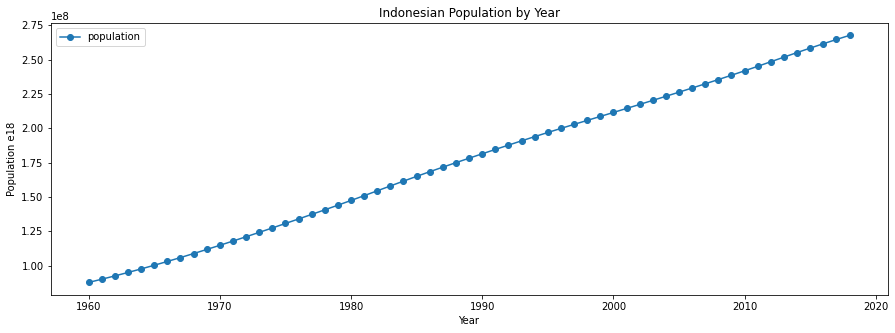

In [131]:
df1.plot.line(
    x='year',
    y='population', 
    figsize=(15,5),
    title='Indonesian Population by Year',
    xlabel='Year',
    ylabel='Population e18',
    marker='o',
    )

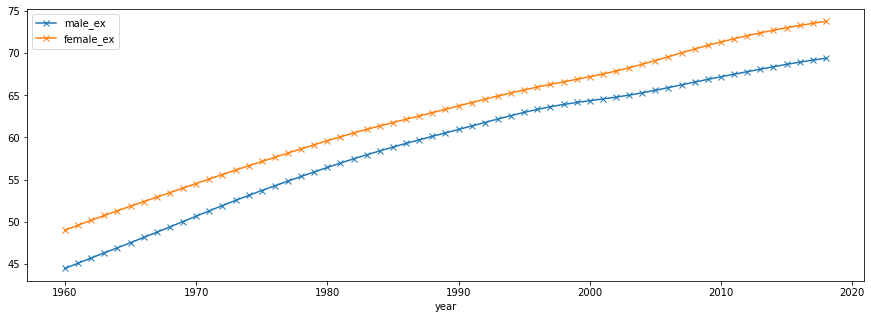

In [132]:
df1.plot.line(
    x='year',
    y=['male_ex','female_ex'], 
    figsize=(15,5),
    marker='x'
    )

In [133]:
df1['margin_u5'] = df1['male_u5'] - df1['female_u5']
df1['margin_ex'] = df1['female_ex'] - df1['male_ex']
df1.head(10)

,year,population,urban,male_u5,female_u5,male_ex,female_ex,margin_u5,margin_ex
0,1960,87751068,14.586,236.9,208.7,44.475,49.009,28.2,4.534
1,1961,90098394,14.821,230.7,203.2,45.098,49.604,27.5,4.506
2,1962,92518377,15.058,224.8,197.9,45.713,50.185,26.9,4.472
3,1963,95015297,15.299,218.9,192.6,46.322,50.752,26.3,4.430
4,1964,97596733,15.543,213.1,187.2,46.927,51.306,25.9,4.379
5,1965,100267062,15.789,207.3,181.7,47.533,51.851,25.6,4.318
6,1966,103025426,16.039,201.4,176.2,48.146,52.389,25.2,4.243
7,1967,105865571,16.293,195.4,170.6,48.767,52.925,24.8,4.158
8,1968,108779924,16.549,189.5,165.0,49.395,53.461,24.5,4.066
9,1969,111758563,16.809,183.5,159.4,50.030,53.999,24.1,3.969


In [134]:
data = df1[['margin_u5','margin_ex']]
scaler = MinMaxScaler().fit(data)

hasil = scaler.transform(data)
print(hasil)

[[1.         1.        ]
 [0.97058824 0.98520085]
 [0.94537815 0.96723044]
 [0.92016807 0.94503171]
 [0.90336134 0.91807611]
 [0.8907563  0.8858351 ]
 [0.87394958 0.8461945 ]
 [0.85714286 0.8012685 ]
 [0.84453782 0.75264271]
 [0.82773109 0.70137421]
 [0.81512605 0.64852008]
 [0.79411765 0.59672304]
 [0.77310924 0.54704017]
 [0.74789916 0.50105708]
 [0.73109244 0.45983087]
 [0.70168067 0.42230444]
 [0.68067227 0.39006342]
 [0.65966387 0.35940803]
 [0.6302521  0.33192389]
 [0.60504202 0.30443975]
 [0.57563025 0.27801268]
 [0.54621849 0.25105708]
 [0.51680672 0.2230444 ]
 [0.49159664 0.19450317]
 [0.46638655 0.16649049]
 [0.44537815 0.14006342]
 [0.42857143 0.11733615]
 [0.41176471 0.09989429]
 [0.38655462 0.08826638]
 [0.37815126 0.08086681]
 [0.35294118 0.07610994]
 [0.34033613 0.06976744]
 [0.32352941 0.05919662]
 [0.30252101 0.04386892]
 [0.28571429 0.02589852]
 [0.26470588 0.00951374]
 [0.24789916 0.        ]
 [0.23529412 0.00211416]
 [0.22268908 0.01955603]
 [0.19327731 0.05285412]


In [135]:
df1[['norm_u5', 'norm_ex']] = hasil
df1.head(10)

,year,population,urban,male_u5,female_u5,male_ex,female_ex,margin_u5,margin_ex,norm_u5,norm_ex
0,1960,87751068,14.586,236.9,208.7,44.475,49.009,28.2,4.534,1.000000,1.000000
1,1961,90098394,14.821,230.7,203.2,45.098,49.604,27.5,4.506,0.970588,0.985201
2,1962,92518377,15.058,224.8,197.9,45.713,50.185,26.9,4.472,0.945378,0.967230
3,1963,95015297,15.299,218.9,192.6,46.322,50.752,26.3,4.430,0.920168,0.945032
4,1964,97596733,15.543,213.1,187.2,46.927,51.306,25.9,4.379,0.903361,0.918076
5,1965,100267062,15.789,207.3,181.7,47.533,51.851,25.6,4.318,0.890756,0.885835
6,1966,103025426,16.039,201.4,176.2,48.146,52.389,25.2,4.243,0.873950,0.846195
7,1967,105865571,16.293,195.4,170.6,48.767,52.925,24.8,4.158,0.857143,0.801268
8,1968,108779924,16.549,189.5,165.0,49.395,53.461,24.5,4.066,0.844538,0.752643
9,1969,111758563,16.809,183.5,159.4,50.030,53.999,24.1,3.969,0.827731,0.701374


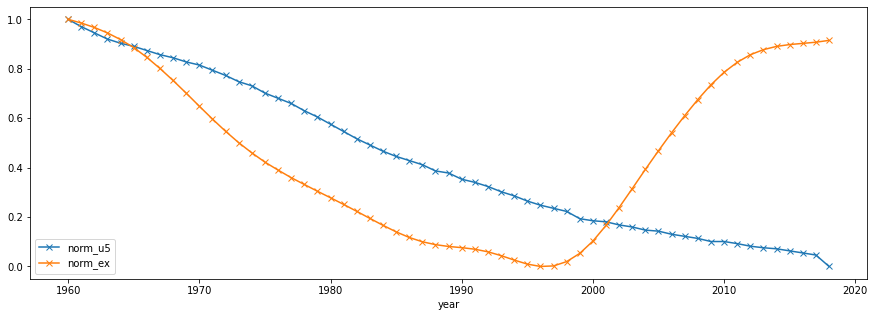

In [136]:
df1.plot.line(
    x='year',
    y=['norm_u5','norm_ex'], 
    figsize=(15,5),
    marker='x'
    )

In [137]:
corr = df1.corr() # corr untuk membuat korelasi pada dataset
round(corr, 3) # round = 2 untuk membulatkan hasil korelasi sebanyak 2 angka dibelakang koma

,year,population,urban,male_u5,female_u5,male_ex,female_ex,margin_u5,margin_ex,norm_u5,norm_ex
year,1.000,1.000,0.988,-0.981,-0.979,0.987,0.996,-0.987,-0.078,-0.987,-0.078
population,1.000,1.000,0.988,-0.981,-0.980,0.987,0.996,-0.988,-0.087,-0.988,-0.087
urban,0.988,0.988,1.000,-0.947,-0.944,0.954,0.972,-0.962,0.030,-0.962,0.030
male_u5,-0.981,-0.981,-0.947,1.000,1.000,-0.999,-0.992,0.995,0.263,0.995,0.263
female_u5,-0.979,-0.980,-0.944,1.000,1.000,-0.998,-0.991,0.994,0.267,0.994,0.267
male_ex,0.987,0.987,0.954,-0.999,-0.998,1.000,0.996,-0.996,-0.233,-0.996,-0.233
female_ex,0.996,0.996,0.972,-0.992,-0.991,0.996,1.000,-0.993,-0.148,-0.993,-0.148
margin_u5,-0.987,-0.988,-0.962,0.995,0.994,-0.996,-0.993,1.000,0.228,1.000,0.228
margin_ex,-0.078,-0.087,0.030,0.263,0.267,-0.233,-0.148,0.228,1.000,0.228,1.000
norm_u5,-0.987,-0.988,-0.962,0.995,0.994,-0.996,-0.993,1.000,0.228,1.000,0.228


In [138]:
r_square = corr**2
round(r_square, 3)

,year,population,urban,male_u5,female_u5,male_ex,female_ex,margin_u5,margin_ex,norm_u5,norm_ex
year,1.000,0.999,0.976,0.962,0.959,0.973,0.993,0.974,0.006,0.974,0.006
population,0.999,1.000,0.976,0.963,0.960,0.975,0.993,0.977,0.008,0.977,0.008
urban,0.976,0.976,1.000,0.896,0.891,0.909,0.946,0.926,0.001,0.926,0.001
male_u5,0.962,0.963,0.896,1.000,1.000,0.997,0.985,0.991,0.069,0.991,0.069
female_u5,0.959,0.960,0.891,1.000,1.000,0.997,0.983,0.989,0.071,0.989,0.071
male_ex,0.973,0.975,0.909,0.997,0.997,1.000,0.993,0.993,0.054,0.993,0.054
female_ex,0.993,0.993,0.946,0.985,0.983,0.993,1.000,0.986,0.022,0.986,0.022
margin_u5,0.974,0.977,0.926,0.991,0.989,0.993,0.986,1.000,0.052,1.000,0.052
margin_ex,0.006,0.008,0.001,0.069,0.071,0.054,0.022,0.052,1.000,0.052,1.000
norm_u5,0.974,0.977,0.926,0.991,0.989,0.993,0.986,1.000,0.052,1.000,0.052


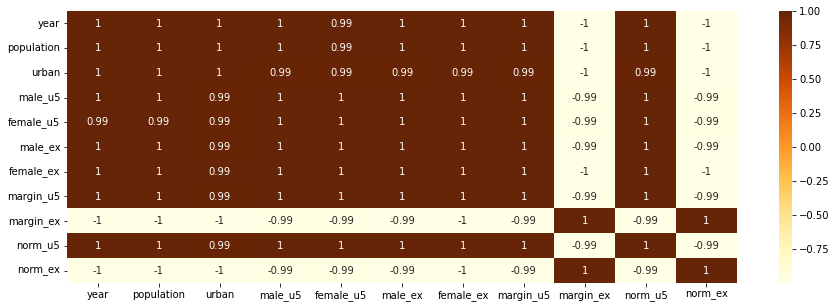

In [139]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(r_square.corr(), center=0, cmap='YlOrBr', annot=True)

In [140]:
endog = df1['population']
model =sm.tsa.SARIMAX(endog, trend='c')
res = model.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:             population   No. Observations:                   59
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -981.166
Date:                Wed, 02 Mar 2022   AIC                           1968.332
Time:                        13:36:47   BIC                           1974.565
Sample:                             0   HQIC                          1970.765
                                 - 59                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.811e+06   2.15e-12   1.31e+18      0.000    2.81e+06    2.81e+06
ar.L1          0.9856      0.000   3170.201      0.000       0.985       0.986
sigma2      9.605e+12   1.65e-19   5.83e+31      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [141]:
pred = res.get_forecast(3)

print(pred.summary_frame(alpha=0.05))

population          mean       mean_se  mean_ci_lower  mean_ci_upper
59          2.666172e+08  3.099252e+06   2.605427e+08   2.726916e+08
60          2.655860e+08  4.351536e+06   2.570571e+08   2.741148e+08
61          2.645696e+08  5.291442e+06   2.541986e+08   2.749407e+08
